# 01. Ridge and Lasso Regression | الانحدار ريدج ولاسو

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1: All examples** - Data processing, linear regression, polynomial regression
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic linear algebra**: Understanding coefficients and regularization

**If you haven't completed these**, you might struggle with:
- Understanding why regularization is needed
- Knowing when to use Ridge vs Lasso
- Understanding how alpha (regularization strength) works

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 2, Example 1** - it solves the overfitting problem from polynomial regression!

**Why this example FIRST in Unit 2?**
- **Before** you can use advanced techniques, you need to solve overfitting
- **Before** you can build robust models, you need regularization
- **Before** you can handle multicollinearity, you need Ridge/Lasso

**Builds on**: 
- 📓 Unit 1, Example 4: Linear Regression (we know basic regression)
- 📓 Unit 1, Example 5: Polynomial Regression (we saw overfitting!)

**Leads to**: 
- 📓 Example 2: Cross-Validation (evaluates models properly)
- 📓 Unit 3: Classification (same regularization concepts apply)
- 📓 All ML models (regularization is universal!)

**Why this order?**
1. Ridge/Lasso solve **overfitting** (critical problem from Unit 1)
2. Ridge/Lasso teach **regularization** (essential ML concept)
3. Ridge/Lasso show **feature selection** (Lasso automatically selects features)

---

## The Story: Preventing Overfitting | القصة: منع الإفراط في التلائم

Imagine you're learning to drive. **Before** regularization, you memorize every turn on the training route perfectly, but fail on new routes (overfitting). **After** regularization, you learn general driving principles that work everywhere!

Same with machine learning: **Before** Ridge/Lasso, models memorize training data perfectly but fail on new data. **After** Ridge/Lasso, models learn general patterns that generalize well!

---

## Why Ridge and Lasso Matter | لماذا يهم ريدج ولاسو؟

Regularization prevents overfitting:
- **Ridge (L2)**: Shrinks coefficients toward zero (keeps all features)
- **Lasso (L1)**: Shrinks some coefficients to exactly zero (feature selection!)
- **Both**: Prevent overfitting by penalizing large coefficients
- **Alpha**: Controls regularization strength (higher = more regularization)

## Learning Objectives | أهداف التعلم
1. Build Ridge regression models (L2 regularization)
2. Build Lasso regression models (L1 regularization)
3. Understand the difference between Ridge and Lasso
4. Tune alpha hyperparameter
5. Compare regularized models with linear regression
6. Understand when to use each method

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build regularized regression models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import (
    LinearRegression,  # Baseline model (no regularization)
    Ridge,             # L2 regularization (shrinks coefficients)
    Lasso              # L1 regularization (shrinks + feature selection)
)
from sklearn.preprocessing import StandardScaler  # Important! Regularization needs scaled features
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation

print("✅ Libraries imported successfully!")
print("\n📚 What each model does:")
print("   - LinearRegression: No regularization (baseline)")
print("   - Ridge: L2 regularization (keeps all features, shrinks coefficients)")
print("   - Lasso: L1 regularization (removes some features, shrinks others)")
print("   - StandardScaler: CRITICAL! Regularization requires scaled features!")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


✅ Libraries imported successfully!

📚 What each model does:
   - LinearRegression: No regularization (baseline)
   - Ridge: L2 regularization (keeps all features, shrinks coefficients)
   - Lasso: L1 regularization (removes some features, shrinks others)
   - StandardScaler: CRITICAL! Regularization requires scaled features!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We saw overfitting in polynomial regression - models that fit training data too well but fail on new data.

**AFTER**: We'll use Ridge and Lasso regularization to prevent overfitting by penalizing large coefficients!

**Why this matters**: Overfitting is the #1 problem in ML. Regularization is the #1 solution!

In [2]:
# Generate sample data with multicollinearity
# Multicollinearity = features are correlated with each other
# This is a common real-world problem that regularization solves!

print("\n1. Generating data with multicollinearity...")
print("إنشاء بيانات مع ارتباط متعدد...")

np.random.seed(42)  # For reproducibility
n_samples = 200



1. Generating data with multicollinearity...
إنشاء بيانات مع ارتباط متعدد...


## Step 1: Generate Data with Multicollinearity | الخطوة 1: إنشاء بيانات مع ارتباط متعدد

**BEFORE**: We need to learn regularization, but we need data that causes problems (multicollinearity).

**AFTER**: We'll create data where features are correlated - this is when regularization helps most!

**Why multicollinearity?** When features are correlated, regular linear regression struggles. Ridge/Lasso handle this better!

In [3]:
# Create features with some correlation (multicollinearity)
# Why create correlated features? Real data often has this problem!
# When features are correlated, regular regression becomes unstable
X = np.random.randn(n_samples, 10)  # 10 independent features initially

# Make some features correlated (multicollinearity!)
# feature_2 is similar to feature_0 (correlated)
X[:, 2] = X[:, 0] + 0.5 * np.random.randn(n_samples)
# feature_3 is similar to feature_1 (correlated)
X[:, 3] = X[:, 1] + 0.5 * np.random.randn(n_samples)

print("   ✅ Created 10 features with multicollinearity")
print("   - feature_2 is correlated with feature_0")
print("   - feature_3 is correlated with feature_1")
print("   - This will cause problems for regular regression!")

   ✅ Created 10 features with multicollinearity
   - feature_2 is correlated with feature_0
   - feature_3 is correlated with feature_1
   - This will cause problems for regular regression!


In [4]:
# Generate target based on multiple features
# True relationship: y depends on features 0, 1, 2, 3 (others are noise)
# We add noise to simulate real-world data
y = (2 * X[:, 0] + 1.5 * X[:, 1] - 1 * X[:, 2] +
     3 * X[:, 3] + np.random.normal(0, 0.5, n_samples))

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['target'] = y

print(f"\n📊 Data Shape: {df.shape}")
print(df.head())
print("\n🔍 Notice:")
print("   - 10 features, but only 4 are actually important (0, 1, 2, 3)")
print("   - Features 2 and 3 are correlated with 0 and 1 (multicollinearity)")
print("   - Regular regression will struggle; Ridge/Lasso will handle this better!")


📊 Data Shape: (200, 11)
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.496714  -0.138264   0.159125   0.763910  -0.234153  -0.234137   
1  -0.463418  -0.465730  -0.535677  -0.561182  -1.724918  -0.562288   
2   1.465649  -0.225776   1.069439   0.134103  -0.544383   0.110923   
3  -0.601707   1.852278  -0.755687   1.205642   0.822545  -1.220844   
4   0.738467   0.171368  -0.208341  -0.306850  -1.478522  -0.719844   

   feature_6  feature_7  feature_8  feature_9    target  
0   1.579213   0.767435  -0.469474   0.542560  2.557767  
1  -1.012831   0.314247  -0.908024  -1.412304 -2.684888  
2  -1.150994   0.375698  -0.600639  -0.291694  1.652162  
3   0.208864  -1.959670  -1.328186   0.196861  5.811789  
4  -0.460639   1.057122   0.343618  -1.763040  1.858503  

🔍 Notice:
   - 10 features, but only 4 are actually important (0, 1, 2, 3)
   - Features 2 and 3 are correlated with 0 and 1 (multicollinearity)
   - Regular regression will struggle; Ridge/Lasso wil

In [5]:
# Split data
X_data = df.drop('target', axis=1)
y_data = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

# Scale features (important for regularization)
# Regularization is sensitive to feature scale, so we MUST scale first!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✅ Data split and scaled!")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")

   ✅ Data split and scaled!
   Training set: 160 samples
   Test set: 40 samples


In [6]:
print("\n" + "=" * 60)
print("1. Linear Regression (Baseline)")
print("الانحدار الخطي (خط الأساس)")
print("=" * 60)

# Try regular linear regression first (no regularization)
# This is our baseline to compare against
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"\n📊 Linear Regression Results:")
print(f"   MSE: {lr_mse:.4f} (lower is better)")
print(f"   R² Score: {lr_r2:.4f} (closer to 1 is better)")
print(f"\n   Coefficients (first 5): {lr.coef_[:5]}")
print(f"   Notice: Some coefficients might be large or unstable")
print(f"   Regularization will help stabilize these!")



1. Linear Regression (Baseline)
الانحدار الخطي (خط الأساس)

📊 Linear Regression Results:
   MSE: 0.3103 (lower is better)
   R² Score: 0.9874 (closer to 1 is better)

   Coefficients (first 5): [ 1.8623268   1.80507639 -1.03218382  3.60025109 -0.00461928]
   Notice: Some coefficients might be large or unstable
   Regularization will help stabilize these!


In [7]:
# Note: Scaling was done in cell 7 above
# This cell is kept for reference but scaling happens earlier now

In [8]:
print("\n" + "=" * 60)
print("2. Ridge Regression (L2 Regularization)")
print("الانحدار ريدج (التنظيم L2)")
print("=" * 60)

# Ridge regression with different alpha values
# Alpha = regularization strength (higher = more regularization)
# Why try different alphas? We need to find the best balance!
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = []

print("\n   Trying different alpha values...")
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Create Ridge model with this alpha
    ridge.fit(X_train_scaled, y_train)  # Train on scaled data
    ridge_pred = ridge.predict(X_test_scaled)  # Predict on test data
    
    mse = mean_squared_error(y_test, ridge_pred)
    r2 = r2_score(y_test, ridge_pred)
    
    ridge_results.append({
        'alpha': alpha,
        'mse': mse,
        'r2': r2,
        'model': ridge
    })
    print(f"   Alpha {alpha:6.2f}: MSE = {mse:.4f}, R² = {r2:.4f}")



2. Ridge Regression (L2 Regularization)
الانحدار ريدج (التنظيم L2)

   Trying different alpha values...
   Alpha   0.01: MSE = 0.3103, R² = 0.9874
   Alpha   0.10: MSE = 0.3109, R² = 0.9874
   Alpha   1.00: MSE = 0.3198, R² = 0.9870
   Alpha  10.00: MSE = 0.4985, R² = 0.9798
   Alpha 100.00: MSE = 2.5993, R² = 0.8947


In [9]:
# 1. Linear Regression (Baseline)
print("\n" + "=" * 60)
print("1. Linear Regression (Baseline)")
print("الانحدار الخطي (خط الأساس)")
print("=" * 60)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"MSE: {lr_mse:.4f}")
print(f"R² Score: {lr_r2:.4f}")
print(f"\nCoefficients: {lr.coef_[:5]}...")  # Show first 5


1. Linear Regression (Baseline)
الانحدار الخطي (خط الأساس)
MSE: 0.3103
R² Score: 0.9874

Coefficients: [ 1.8623268   1.80507639 -1.03218382  3.60025109 -0.00461928]...


In [10]:
# 2. Ridge Regression (L2 Regularization)
print("\n" + "=" * 60)
print("2. Ridge Regression (L2 Regularization)")
print("الانحدار ريدج (التنظيم L2)")
print("=" * 60)


2. Ridge Regression (L2 Regularization)
الانحدار ريدج (التنظيم L2)


In [11]:
print("\n" + "=" * 60)
print("3. Lasso Regression (L1 Regularization)")
print("الانحدار لاسو (التنظيم L1)")
print("=" * 60)

# Lasso regression with different alpha values
# Lasso does feature selection - sets some coefficients to zero!
lasso_results = []

print("\n   Trying different alpha values...")
for alpha in alphas:
    lasso = Lasso(alpha=alpha)  # Create Lasso model
    lasso.fit(X_train_scaled, y_train)  # Train on scaled data
    lasso_pred = lasso.predict(X_test_scaled)  # Predict
    
    mse = mean_squared_error(y_test, lasso_pred)
    r2 = r2_score(y_test, lasso_pred)
    
    # Count non-zero coefficients (features that Lasso kept)
    # Why check this? Lasso removes features by setting coefficients to zero!
    n_features = np.sum(np.abs(lasso.coef_) > 0.01)
    
    lasso_results.append({
        'alpha': alpha,
        'mse': mse,
        'r2': r2,
        'n_features': n_features,  # How many features Lasso kept
        'model': lasso
    })
    print(f"   Alpha {alpha:6.2f}: MSE = {mse:.4f}, R² = {r2:.4f}, Features = {n_features}/10")



3. Lasso Regression (L1 Regularization)
الانحدار لاسو (التنظيم L1)

   Trying different alpha values...
   Alpha   0.01: MSE = 0.3067, R² = 0.9876, Features = 7/10
   Alpha   0.10: MSE = 0.5061, R² = 0.9795, Features = 4/10
   Alpha   1.00: MSE = 2.3446, R² = 0.9050, Features = 2/10
   Alpha  10.00: MSE = 26.1834, R² = -0.0605, Features = 0/10
   Alpha 100.00: MSE = 26.1834, R² = -0.0605, Features = 0/10


In [12]:
# Try different alpha values
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    mse = mean_squared_error(y_test, ridge_pred)
    r2 = r2_score(y_test, ridge_pred)
    ridge_results.append({
        'alpha': alpha,
        'mse': mse,
        'r2': r2,
        'model': ridge
    })

In [13]:
# Find best alpha
best_ridge = min(ridge_results, key=lambda x: x['mse'])
print(f"\nBest Alpha: {best_ridge['alpha']}")
print(f"Best MSE: {best_ridge['mse']:.4f}")
print(f"Best R²: {best_ridge['r2']:.4f}")


Best Alpha: 0.01
Best MSE: 0.3103
Best R²: 0.9874


In [14]:
# 3. Lasso Regression (L1 Regularization)
print("\n" + "=" * 60)
print("3. Lasso Regression (L1 Regularization)")
print("الانحدار لاسو (التنظيم L1)")
print("=" * 60)
lasso_results = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    mse = mean_squared_error(y_test, lasso_pred)
    r2 = r2_score(y_test, lasso_pred)
    n_features = np.sum(np.abs(lasso.coef_) > 0.01)  # Non-zero coefficients
    lasso_results.append({
        'alpha': alpha,
        'mse': mse,
        'r2': r2,
        'n_features': n_features,
        'model': lasso
    })


3. Lasso Regression (L1 Regularization)
الانحدار لاسو (التنظيم L1)


In [15]:
# Find best alpha
best_lasso = min(lasso_results, key=lambda x: x['mse'])
print(f"\nBest Alpha: {best_lasso['alpha']}")
print(f"Best MSE: {best_lasso['mse']:.4f}")
print(f"Best R²: {best_lasso['r2']:.4f}")
print(f"Features used: {best_lasso['n_features']}/10")


Best Alpha: 0.01
Best MSE: 0.3067
Best R²: 0.9876
Features used: 7/10


In [ ]:
# 4. Comparison
print("\n" + "=" * 60)
print("4. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
comparison = pd.DataFrame({
    'Model': ['Linear Regression', f'Ridge (α={best_ridge["alpha"]})',
              f'Lasso (α={best_lasso["alpha"]})'],
    'Test MSE': [lr_mse, best_ridge['mse'], best_lasso['mse']],
    'Test R²': [lr_r2, best_ridge['r2'], best_lasso['r2']]
})
print("\nComparison Table:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

# Find best model
best_mse_idx = comparison['Test MSE'].idxmin()
best_r2_idx = comparison['Test R²'].idxmin()
best_model_mse = comparison.loc[best_mse_idx, 'Model']
best_model_r2 = comparison.loc[best_r2_idx, 'Model']

print(f"\n📊 Best Model by MSE: {best_model_mse}")
print(f"   - Lowest error: {comparison['Test MSE'].min():.4f}")
print(f"   - This model has the smallest prediction errors")

print(f"\n📊 Best Model by R²: {best_model_r2}")
print(f"   - Highest R²: {comparison['Test R²'].max():.4f}")
print(f"   - This model explains the most variance")

print(f"\n🔍 Key Observations:")
mse_diff = comparison['Test MSE'].max() - comparison['Test MSE'].min()
r2_diff = comparison['Test R²'].max() - comparison['Test R²'].min()

if mse_diff < 0.01:
    print(f"   - ✅ All models perform similarly (MSE difference: {mse_diff:.4f})")
    print(f"   - Regularization didn't significantly improve performance")
    print(f"   - Original model may not have overfitting issues")
else:
    print(f"   - ⚠️  Significant performance difference (MSE range: {mse_diff:.4f})")
    print(f"   - Regularization {'improved' if best_model_mse != 'Linear Regression' else 'did not improve'} performance")

if r2_diff < 0.01:
    print(f"   - ✅ R² scores are very close (difference: {r2_diff:.4f})")
else:
    print(f"   - ⚠️  R² scores differ (range: {r2_diff:.4f})")

print(f"\n📚 What This Teaches Us:")
print(f"   - Compare models using multiple metrics (MSE and R²)")
print(f"   - Lower MSE = better predictions (less error)")
print(f"   - Higher R² = better fit (explains more variance)")
print(f"   - Regularization (Ridge/Lasso) helps when there's overfitting")
print(f"   - If all models are similar, original model may be fine")
print(f"   - Lasso has advantage: automatic feature selection (removes irrelevant features)")

# Check if Lasso removed features
if best_lasso['n_features'] < len(X_data.columns):
    print(f"\n💡 Lasso Feature Selection:")
    print(f"   - Lasso used only {best_lasso['n_features']}/{len(X_data.columns)} features")
    print(f"   - Removed {len(X_data.columns) - best_lasso['n_features']} features (set coefficients to 0)")
    print(f"   - This is Lasso's unique advantage: automatic feature selection!")
    print(f"   - Simpler model (fewer features) = easier to interpret")


4. Model Comparison
مقارنة النماذج

Comparison Table:
            Model  Test MSE  Test R²
Linear Regression  0.310255 0.987434
   Ridge (α=0.01)  0.310320 0.987432
   Lasso (α=0.01)  0.306749 0.987576


In [ ]:
# 5. Coefficient Comparison
print("\n" + "=" * 60)
print("5. Coefficient Comparison")
print("مقارنة المعاملات")
print("=" * 60)
coef_comparison = pd.DataFrame({
    'Feature': X_data.columns,
    'Linear': lr.coef_,
    'Ridge': best_ridge['model'].coef_,
    'Lasso': best_lasso['model'].coef_
})
print("\nCoefficient Comparison (first 5 features):")
print(coef_comparison.head().to_string(index=False))
print("\nLasso shrinks many coefficients to zero (feature selection)")
print("لاسو يقلص العديد من المعاملات إلى الصفر (اختيار الميزات)")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Understanding Coefficient Differences | فهم اختلافات المعاملات")
print("=" * 60)

# Count zero coefficients
lasso_zeros = (np.abs(best_lasso['model'].coef_) < 0.01).sum()
ridge_zeros = (np.abs(best_ridge['model'].coef_) < 0.01).sum()
linear_zeros = (np.abs(lr.coef_) < 0.01).sum()

print(f"\n📊 Coefficient Analysis:")
print(f"   - Linear Regression: {linear_zeros} coefficients near zero")
print(f"   - Ridge: {ridge_zeros} coefficients near zero (shrinks but keeps all)")
print(f"   - Lasso: {lasso_zeros} coefficients set to zero (feature selection!)")

print(f"\n🔍 What This Shows:")
print(f"   - Ridge: Shrinks coefficients toward 0 but keeps all features")
print(f"   - Lasso: Can completely remove features (coefficient = 0)")
print(f"   - Lasso's sparsity: Only {best_lasso['n_features']} features have non-zero coefficients")

# Compare coefficient magnitudes
coef_diff_ridge = np.abs(lr.coef_ - best_ridge['model'].coef_)
coef_diff_lasso = np.abs(lr.coef_ - best_lasso['model'].coef_)

print(f"\n📊 Coefficient Shrinking:")
print(f"   - Ridge average change: {coef_diff_ridge.mean():.4f}")
print(f"   - Lasso average change: {coef_diff_lasso.mean():.4f}")
if coef_diff_lasso.mean() > coef_diff_ridge.mean():
    print(f"   - Lasso shrinks coefficients more aggressively")

print(f"\n📚 What This Teaches Us:")
print(f"   - Regularization reduces coefficient magnitudes (prevents overfitting)")
print(f"   - Ridge: Gentle shrinking, keeps all features")
print(f"   - Lasso: Aggressive shrinking, removes irrelevant features")
print(f"   - Smaller coefficients = simpler model = better generalization")
print(f"   - Lasso is useful when you have many features (automatic feature selection)")
print(f"   - Ridge is useful when all features might be relevant")


5. Coefficient Comparison
مقارنة المعاملات

Coefficient Comparison (first 5 features):
  Feature    Linear     Ridge     Lasso
feature_0  1.862327  1.861340  1.760599
feature_1  1.805076  1.805861  1.808410
feature_2 -1.032184 -1.031217 -0.931730
feature_3  3.600251  3.599223  3.576754
feature_4 -0.004619 -0.004660 -0.000000

Lasso shrinks many coefficients to zero (feature selection)
لاسو يقلص العديد من المعاملات إلى الصفر (اختيار الميزات)


## Step 7: Decision Framework - When to Use Ridge vs Lasso | الخطوة 7: إطار القرار - متى تستخدم ريدج مقابل لاسو

**BEFORE**: You've learned how to build Ridge and Lasso models, but when should you use each one?

**AFTER**: You'll have a clear decision framework to choose between Ridge, Lasso, or regular Linear Regression!

**Why this matters**: Using the wrong regularization method can:
- **Miss important features** → Lasso removes features you need
- **Keep irrelevant features** → Ridge keeps all features even when some are noise
- **Poor performance** → Wrong method leads to worse predictions

---

### 🎯 Decision Framework: Ridge vs Lasso vs Linear Regression | إطار القرار: ريدج مقابل لاسو مقابل الانحدار الخطي

**Key Question**: Should I use **LINEAR REGRESSION**, **RIDGE**, or **LASSO**?

#### Decision Tree:

```
Do you have overfitting?
├─ NO → Use LINEAR REGRESSION ✅
│   └─ Why? No need for regularization if model generalizes well
│
└─ YES → Check your situation:
    ├─ Many features (>20)? → Continue to next step
    │
    ├─ Need feature selection? → Use LASSO ✅
    │   └─ Why? Lasso removes irrelevant features automatically
    │
    ├─ Multicollinearity present? → Use RIDGE ✅
    │   └─ Why? Ridge handles correlated features better
    │
    ├─ All features important? → Use RIDGE ✅
    │   └─ Why? Ridge keeps all features, just shrinks them
    │
    └─ Want interpretability? → Use LASSO ✅
        └─ Why? Fewer features = simpler model
```

#### Detailed Decision Process:

```
Step 1: Check if regularization is needed
├─ Train R² >> Test R²? → YES, overfitting present
│   └─ Use Ridge or Lasso
│
└─ Train R² ≈ Test R²? → NO, no overfitting
    └─ Use Linear Regression (simpler)

Step 2: If overfitting, choose regularization type
├─ Do you have many features (>20)?
│   ├─ YES → Continue to step 3
│   └─ NO → Try Ridge first (simpler)
│
├─ Do you need feature selection?
│   ├─ YES → Use LASSO
│   │   └─ Why? Automatically removes irrelevant features
│   └─ NO → Continue to step 4
│
├─ Is there multicollinearity (correlated features)?
│   ├─ YES → Use RIDGE
│   │   └─ Why? Ridge handles correlations better
│   └─ NO → Continue to step 5
│
└─ Are all features potentially important?
    ├─ YES → Use RIDGE
    │   └─ Why? Keeps all features, just shrinks them
    └─ NO → Use LASSO
        └─ Why? Removes irrelevant features
```

---

### 📊 Comparison Table: Linear vs Ridge vs Lasso | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear Regression** | No overfitting, few features, interpretable | • Simple<br>• Fast<br>• Interpretable<br>• No hyperparameters | • Can overfit<br>• Sensitive to outliers<br>• Can't handle many features | Small dataset, < 10 features |
| **Ridge (L2)** | Overfitting, multicollinearity, all features important | • Prevents overfitting<br>• Handles multicollinearity<br>• Keeps all features<br>• Stable | • Doesn't remove features<br>• All features contribute<br>• Less interpretable | Many correlated features, all potentially important |
| **Lasso (L1)** | Overfitting, many features, need feature selection | • Prevents overfitting<br>• Automatic feature selection<br>• More interpretable<br>• Simpler models | • Can remove important features<br>• Unstable with correlated features<br>• May over-regularize | High-dimensional data, feature selection needed |

---

### ✅ When to Use Each Method | متى تستخدم كل طريقة

#### Use Linear Regression when:
1. **No Overfitting** ✅
   - Train and test performance are similar
   - Model generalizes well
   - **Example**: Small dataset, few features, good performance

2. **Few Features** ✅
   - Less than 10-15 features
   - All features are important
   - **Example**: House price from size, bedrooms, age

3. **Interpretability Critical** ✅
   - Need to understand exact coefficients
   - No regularization complexity needed
   - **Example**: Medical diagnosis, regulatory compliance

#### Use Ridge Regression when:
1. **Overfitting Present** ✅
   - Train R² much higher than test R²
   - Model memorizes training data
   - **Example**: Polynomial regression with high degree

2. **Multicollinearity** ✅
   - Features are highly correlated
   - Ridge handles correlations better than Lasso
   - **Example**: House features (size, rooms, area all correlated)

3. **All Features Important** ✅
   - Don't want to remove any features
   - Just want to shrink coefficients
   - **Example**: All features are domain-relevant

4. **Many Features** ✅
   - 20+ features
   - Need regularization but want to keep all features
   - **Example**: 50+ features from feature engineering

#### Use Lasso Regression when:
1. **Feature Selection Needed** ✅
   - Many features, some are noise
   - Want automatic feature selection
   - **Example**: 100+ features, need to find important ones

2. **Sparse Solution** ✅
   - Expect only few features matter
   - Want interpretable model
   - **Example**: Gene expression data (few genes matter)

3. **High-Dimensional Data** ✅
   - More features than samples
   - Need to reduce dimensionality
   - **Example**: Text data with thousands of features

---

### ❌ When NOT to Use Each Method | متى لا تستخدم كل طريقة

#### Don't use Linear Regression when:
1. **Severe Overfitting** ❌
   - Train R² >> Test R²
   - **Use Instead**: Ridge or Lasso

2. **Many Features** ❌
   - 50+ features
   - **Use Instead**: Ridge or Lasso

3. **Multicollinearity** ❌
   - Highly correlated features
   - **Use Instead**: Ridge

#### Don't use Ridge when:
1. **Feature Selection Needed** ❌
   - Want to remove irrelevant features
   - **Use Instead**: Lasso

2. **Sparse Solution Expected** ❌
   - Only few features matter
   - **Use Instead**: Lasso

#### Don't use Lasso when:
1. **Multicollinearity Present** ❌
   - Features are highly correlated
   - Lasso may randomly select one
   - **Use Instead**: Ridge

2. **All Features Important** ❌
   - Don't want to remove any features
   - **Use Instead**: Ridge

3. **More Features than Samples** ❌
   - Lasso can select at most n features (n = samples)
   - **Use Instead**: Ridge or Elastic Net

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: House Price Prediction (10 features) ✅ LINEAR REGRESSION
- **Features**: Size, bedrooms, age, location, etc. (10 total)
- **Overfitting**: No (train R² = 0.85, test R² = 0.83)
- **Decision**: ✅ Use Linear Regression
- **Reasoning**: No overfitting, few features, all important

#### Example 2: House Price Prediction (50 features) ✅ RIDGE
- **Features**: Size, bedrooms, age, location, neighborhood stats, etc. (50 total)
- **Overfitting**: Yes (train R² = 0.95, test R² = 0.75)
- **Multicollinearity**: Yes (size, rooms, area all correlated)
- **Decision**: ✅ Use Ridge Regression
- **Reasoning**: Overfitting, many features, multicollinearity, all features potentially important

#### Example 3: Gene Expression Analysis (1000 features) ✅ LASSO
- **Features**: 1000 genes, only 10-20 matter
- **Overfitting**: Yes (train R² = 0.98, test R² = 0.60)
- **Feature Selection**: Critical (need to find important genes)
- **Decision**: ✅ Use Lasso Regression
- **Reasoning**: Many features, need feature selection, sparse solution expected

#### Example 4: Sales Prediction (30 features, some noise) ⚠️ TRY BOTH
- **Features**: 30 features, some are noise
- **Overfitting**: Yes (train R² = 0.92, test R² = 0.78)
- **Decision**: ⚠️ Try both Ridge and Lasso, compare
- **Reasoning**: Overfitting present, some features may be noise, try both methods

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Start with Linear Regression** - Always try simplest model first
2. **Check for overfitting** - Compare train vs test performance
3. **Ridge for multicollinearity** - When features are correlated
4. **Lasso for feature selection** - When you need to remove features
5. **Tune alpha** - Critical hyperparameter for both methods
6. **Scale features first** - Regularization requires scaled features
7. **Try both** - Sometimes try Ridge and Lasso, pick the best

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Predicting house prices with 8 features (size, bedrooms, age, etc.)
- **Overfitting**: No (train R² = 0.88, test R² = 0.86)
- **Decision**: ✅ Linear Regression (no overfitting, few features)

**Scenario 2**: Predicting sales with 50 features, many correlated
- **Overfitting**: Yes (train R² = 0.94, test R² = 0.76)
- **Multicollinearity**: Yes (many correlated features)
- **Decision**: ✅ Ridge Regression (overfitting, multicollinearity, all features important)

**Scenario 3**: Predicting disease from 500 gene expressions
- **Overfitting**: Yes (train R² = 0.97, test R² = 0.65)
- **Feature Selection**: Critical (only few genes matter)
- **Decision**: ✅ Lasso Regression (many features, need feature selection, sparse solution)

---

**Connection to Next Steps**: 
- 📓 **Example 2: Cross-Validation** - For proper evaluation of Ridge/Lasso models
- 📓 **Unit 3: Classification** - Same regularization concepts apply to classification
- 📓 **Unit 5, Example 1: Grid Search** - For tuning alpha hyperparameter



6. Visualization
التصور

✓ Plot saved as 'ridge_lasso_comparison.png'


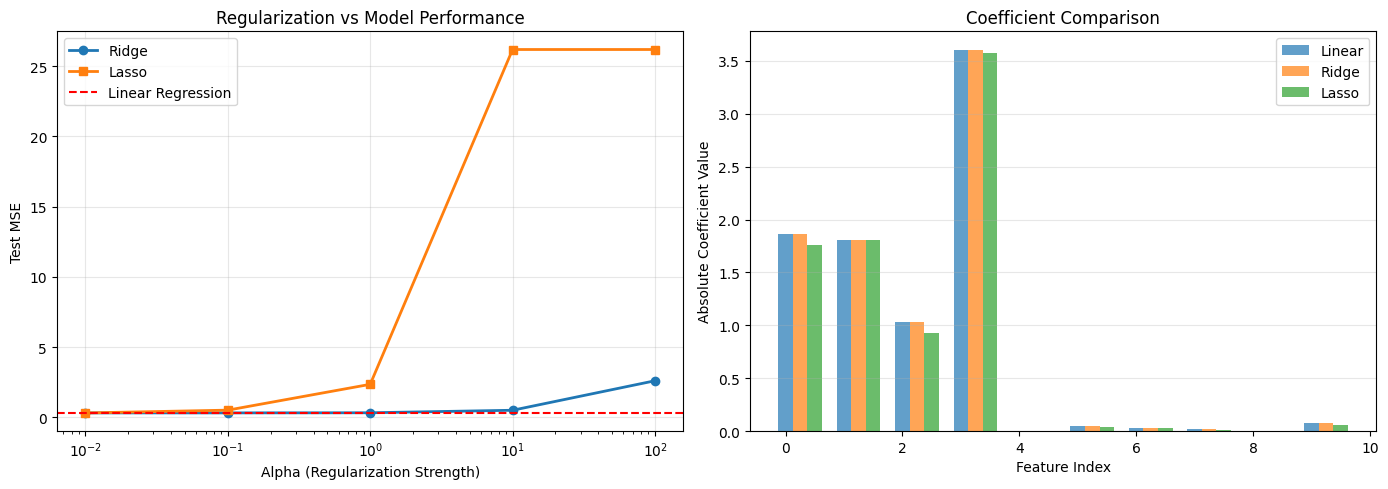


Example 1 Complete! ✓
اكتمل المثال 1! ✓


In [18]:
# 6. Visualization
print("\n" + "=" * 60)
print("6. Visualization")
print("التصور")
print("=" * 60)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Alpha vs MSE
axes[0].semilogx([r['alpha'] for r in ridge_results],
                 [r['mse'] for r in ridge_results],
                 'o-', label='Ridge', linewidth=2)
axes[0].semilogx([l['alpha'] for l in lasso_results],
                 [l['mse'] for l in lasso_results],
                 's-', label='Lasso', linewidth=2)
axes[0].axhline(lr_mse, color='r', linestyle='--', label='Linear Regression')
axes[0].set_xlabel('Alpha (Regularization Strength)')
axes[0].set_ylabel('Test MSE')
axes[0].set_title('Regularization vs Model Performance')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Coefficient magnitudes
axes[1].bar(range(10), np.abs(lr.coef_), alpha=0.7, label='Linear', width=0.25)
axes[1].bar([i + 0.25 for i in range(10)], np.abs(best_ridge['model'].coef_),
            alpha=0.7, label='Ridge', width=0.25)
axes[1].bar([i + 0.5 for i in range(10)], np.abs(best_lasso['model'].coef_),
            alpha=0.7, label='Lasso', width=0.25)
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Absolute Coefficient Value')
axes[1].set_title('Coefficient Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('ridge_lasso_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'ridge_lasso_comparison.png'")
plt.show()
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)